In [1]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import gensim
import hdbscan
from sklearn.decomposition import PCA
import pickle
import numba
import umap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
W2Vmodel = pickle.load( open( "../Final_Models/W2Vmodel.pickle"", "rb" ) )

In [3]:
Y = W2Vmodel[W2Vmodel.wv.vocab]
Y_transf = PCA(n_components = 5).fit_transform(Y)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


## UMAP

We do not recommend to run the following code if you do not have enough computational power.

You can also visualize the results by executing UMAP_plot.ipynb in the root.

In [5]:
mapper = umap.UMAP(n_neighbors=15, min_dist=0.1, low_memory=True,
                     metric='hellinger', n_components=2).fit(Y_transf-min(Y_transf.reshape(Y_transf.shape[0]*5)))

# HDBSCAN

In [24]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=1, 
                                 min_cluster_size=10, 
                                 metric = 'euclidean',
                                 cluster_selection_method = 'leaf').fit_predict(Y_transf-min(Y_transf.reshape(Y_transf.shape[0]*5)))

In [32]:
hover_data = pd.DataFrame({'word':list(W2Vmodel.wv.vocab),
                           'label':hdbscan_labels})

In [33]:
umap.plot.output_notebook()

p = umap.plot.interactive(mapper15, labels=hdbscan_labels, hover_data=hover_data, point_size=3, theme = 'viridis', subset_points = (hdbscan_labels!=-1))

Loading BokehJS ...

In [34]:
umap.plot.show(p)

/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/umap/plot.py:791: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"
/home/ubuntu/anaconda3/envs/NLP/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


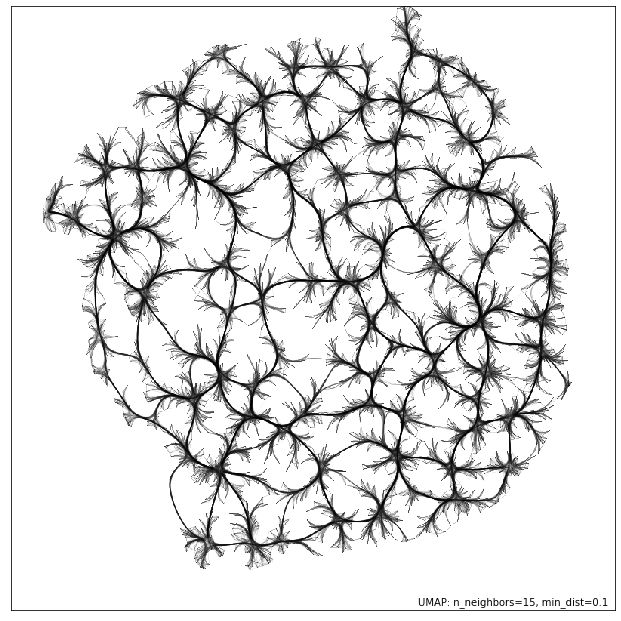

In [9]:
#umap.plot.connectivity(mapper15, edge_bundling='hammer');